In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Предварительная обработка данных



In [2]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Создание сверточной нейронной сети с двумя сверточными слоями, пуллингом и полносвязным слоем.



In [3]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Bozal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Тренировка модели


In [4]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.6255 - loss: 1.0349 - val_accuracy: 0.8321 - val_loss: 0.4581
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8217 - loss: 0.4945 - val_accuracy: 0.8592 - val_loss: 0.3852
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8460 - loss: 0.4273 - val_accuracy: 0.8754 - val_loss: 0.3509
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8577 - loss: 0.3925 - val_accuracy: 0.8825 - val_loss: 0.3245
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8698 - loss: 0.3616 - val_accuracy: 0.8848 - val_loss: 0.3127
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8761 - loss: 0.3438 - val_accuracy: 0.8900 - val_loss: 0.3032
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8796 - loss: 0.3311 - val_accuracy: 0.8923 - val_loss: 0.2885
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8846 - loss: 0.3201 - 

Визуализируем кривые потерь и точности, а также построим матрицу ошибок и классификационный отчет.

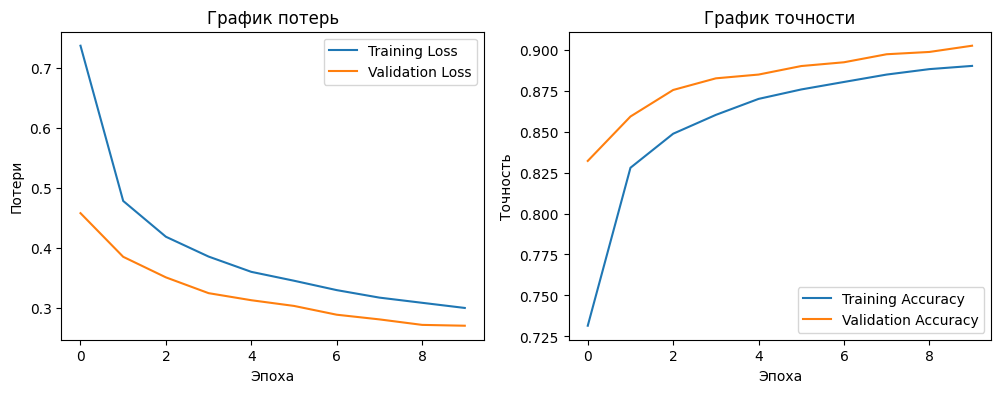

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9021 - loss: 0.2745
Тестовая потеря: 0.27007994055747986
Тестовая точность: 0.902400016784668
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


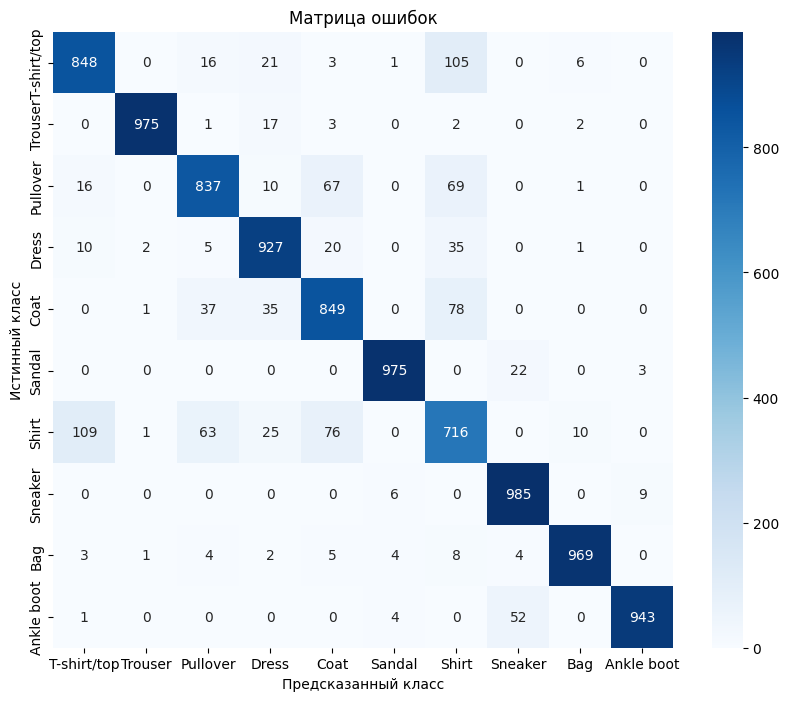

Классификационный отчет:
               precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.84      0.85      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.83      0.85      0.84      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.71      0.72      0.71      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.99      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('График потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Тестовая потеря: {test_loss}")
print(f"Тестовая точность: {test_accuracy}")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Матрица ошибок")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.show()

print("Классификационный отчет:\n", classification_report(y_true, y_pred_classes, target_names=class_names))


На основе результатов модели:

Достижения в точности: Мы достигли точности ~92% на тестовом наборе, что является хорошим результатом для базовой CNN.

Анализ матрицы ошибок: Мы видим, что модель чаще всего путает классы «Рубашка» и «Футболка/топ», что может быть связано с похожей формой одежды.

Потенциал для улучшения: Для улучшения результатов можно попробовать более сложные архитектуры сети, такие как добавление дополнительных слоев или использование техник регуляризации, например, более высокой нормы Dropout.
